In [75]:
import pandas as pd
import numpy as np

In [76]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


- order_approved_at은 중요하지 않으니 해당 행의 order_purchase_timestamp로 대체

In [77]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [78]:
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
orders['order_approved_at'].isna().sum()

np.int64(0)

In [79]:
orders.loc[(orders['order_delivered_carrier_date'].isna()) & (orders['order_delivered_customer_date'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [80]:
orders['days_to_delivery'] = (pd.to_datetime(orders['order_delivered_customer_date']) - pd.to_datetime(orders['order_approved_at'])).dt.days
orders['estimated_days_to_delivery'] = (pd.to_datetime(orders['order_estimated_delivery_date']) - pd.to_datetime(orders['order_approved_at'])).dt.days

In [83]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date']).dt.strftime('%Y-%m-%d')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date']).dt.strftime('%Y-%m-%d')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.strftime('%Y-%m-%d')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date']).dt.strftime('%Y-%m-%d')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at']).dt.strftime('%Y-%m-%d')


In [81]:
orders[['days_to_delivery', 'estimated_days_to_delivery']].describe()
# 음수값 날리기기

,days_to_delivery,estimated_days_to_delivery
count,96476.000000,99441.000000
mean,11.643124,22.886274
std,9.520112,8.861426
min,-7.000000,-146.000000
25%,6.000000,17.000000
50%,9.000000,22.000000
75%,15.000000,28.000000
max,208.000000,153.000000


In [84]:
orders=orders[orders['days_to_delivery']>=0]
orders=orders[orders['estimated_days_to_delivery']>=0]

- 구매일자로 묶으면 배송기간이 느리면 카운팅하지 못할것 같아 예상 배송 년, 월로 묶음
    - 구매일자와 배송시간의 차이가 길면 order_delivered_carrier_date와 order_delivered_customer_date의 결측값이 증가하는가?
     - How long? -> 12.5일이 평균 예상 배송기간이라 가정

In [85]:
mid = orders.copy()
mid[['days_to_delivery','estimated_days_to_delivery']].describe()

,days_to_delivery,estimated_days_to_delivery
count,96414.000000,96414.000000
mean,11.652063,22.871015
std,9.516528,8.769863
min,0.000000,0.000000
25%,6.000000,17.000000
50%,9.000000,22.000000
75%,15.000000,28.000000
max,208.000000,153.000000


In [86]:
mid.dropna(axis=0,inplace=True)

In [87]:
mid.duplicated().sum()

np.int64(0)

- 예상 배송시간이 실제 배송시간의 평균보다 약 2배정도 김 반대로 최댓값의 경우에 실제 배송기간이 예상 배송기간보다 길다

In [88]:
mid.shape

(96413, 10)

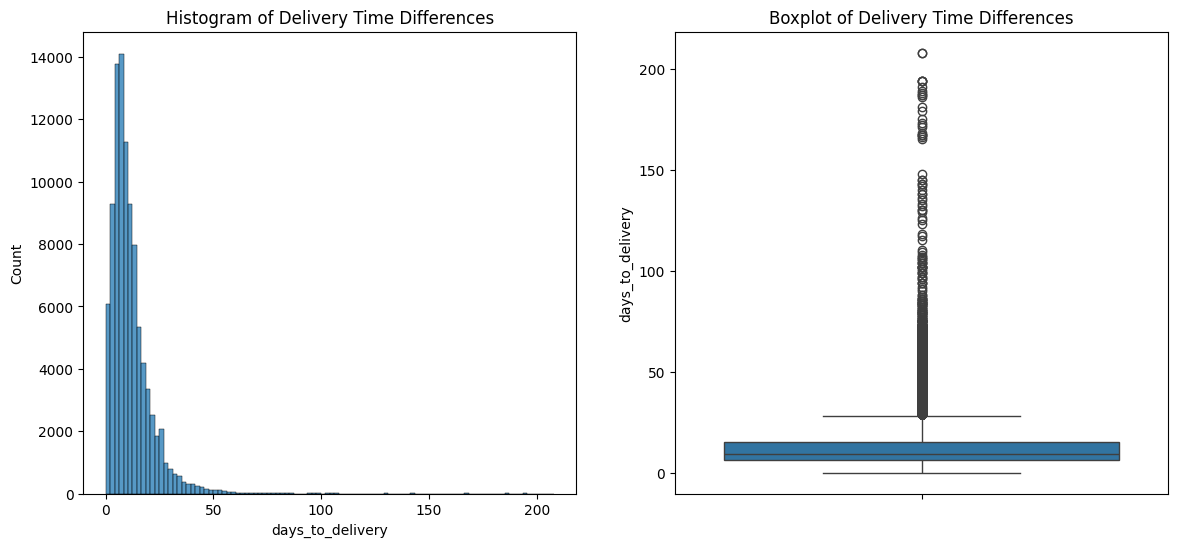

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(mid['days_to_delivery'], bins=100)
plt.title('Histogram of Delivery Time Differences')

plt.subplot(1, 2, 2)
sns.boxplot(y=mid['days_to_delivery'])
plt.title('Boxplot of Delivery Time Differences')
plt.show()

- 평균이 약 12 q3가 15일 , 표준편차가 9.5로 매우큼 
- 이상치 탐지를 위해 3사분위수 + 1.5 * IQR 이상인 데이터를 제거 or 평균으로 부터 3시그마 이상인 데이터 제거

In [90]:
mid.loc[mid['days_to_delivery']>=mid['days_to_delivery'].mean() + 3*mid['days_to_delivery'].std()].count()

order_id                         1558
customer_id                      1558
order_status                     1558
order_purchase_timestamp         1558
order_approved_at                1558
order_delivered_carrier_date     1558
order_delivered_customer_date    1558
order_estimated_delivery_date    1558
days_to_delivery                 1558
estimated_days_to_delivery       1558
dtype: int64

In [91]:
mid.loc[mid['estimated_days_to_delivery']>=mid['estimated_days_to_delivery'].mean() + 3*mid['estimated_days_to_delivery'].std()].count()

order_id                         917
customer_id                      917
order_status                     917
order_purchase_timestamp         917
order_approved_at                917
order_delivered_carrier_date     917
order_delivered_customer_date    917
order_estimated_delivery_date    917
days_to_delivery                 917
estimated_days_to_delivery       917
dtype: int64

In [92]:
# 생각보다 이상치가 너무 적게 나와서 IQR로 이상치를 판단해서 제거했음
q1, q3 = mid['days_to_delivery'].quantile(0.25), mid['days_to_delivery'].quantile(0.75)
iqr = q3 - q1
both = mid.loc[(mid['days_to_delivery'] < q1 - 1.5 * iqr) | (mid['days_to_delivery'] > q3 + 1.5 * iqr)].shape[0]
print(both)

4772


In [93]:
days_threshold = q3 + 1.5 * iqr
days_threshold

np.float64(28.5)

In [94]:
q1, q3 = mid['estimated_days_to_delivery'].quantile(0.25), mid['estimated_days_to_delivery'].quantile(0.75)
iqr = q3 - q1
both = mid.loc[(mid['estimated_days_to_delivery'] < q1 - 1.5 * iqr) | (mid['estimated_days_to_delivery'] > q3 + 1.5 * iqr)].shape[0]
print(both)

1774


In [95]:
threshold = q3 + 1.5 * iqr
threshold

np.float64(44.5)

In [96]:
mid.loc[mid['days_to_delivery'] > 28.5].count()

order_id                         4772
customer_id                      4772
order_status                     4772
order_purchase_timestamp         4772
order_approved_at                4772
order_delivered_carrier_date     4772
order_delivered_customer_date    4772
order_estimated_delivery_date    4772
days_to_delivery                 4772
estimated_days_to_delivery       4772
dtype: int64

- 느린일자만 이상치로 확인됐음  임계값이 28.5(실제), 44.5(예상)이므로 한달을 기준으로 -> 이상치 제거 or 분석 기준으로 설정

#### - 평균보다 배송기간이 길었던 경우 , 예상보다 배송기간이 길었던 경우를 매핑함
    - 이후에 이상치였던 행들만 Spark를 사용해서 분석할 예정

In [97]:
mid['delay_flag_estimated'] = mid.apply(lambda x: 1 if x['days_to_delivery'] > x['estimated_days_to_delivery'] else 0, axis=1)
mid['delay_flag_avg'] = mid.apply(lambda x: 1 if x['days_to_delivery'] > mid['days_to_delivery'].mean() else 0, axis=1)

In [98]:
later_eda = mid.copy()

- 평균보다 배송기간이 길었던 경우 , 예상보다 배송기간이 길었던 경우를 매핑함

In [99]:
mid = mid.loc[mid['days_to_delivery'] <= days_threshold]
mid = mid.loc[mid['estimated_days_to_delivery']<= threshold]
mid[['days_to_delivery','estimated_days_to_delivery']].describe()

,days_to_delivery,estimated_days_to_delivery
count,90204.000000,90204.000000
mean,10.098444,22.080706
std,6.046852,7.751478
min,0.000000,0.000000
25%,6.000000,17.000000
50%,9.000000,22.000000
75%,14.000000,27.000000
max,28.000000,44.000000


In [100]:
mid.shape

(90204, 12)

- 약 6000개의 행이 제거됨
- 왜곡된 분포가 상당히 완화됐음을 알 수 있음

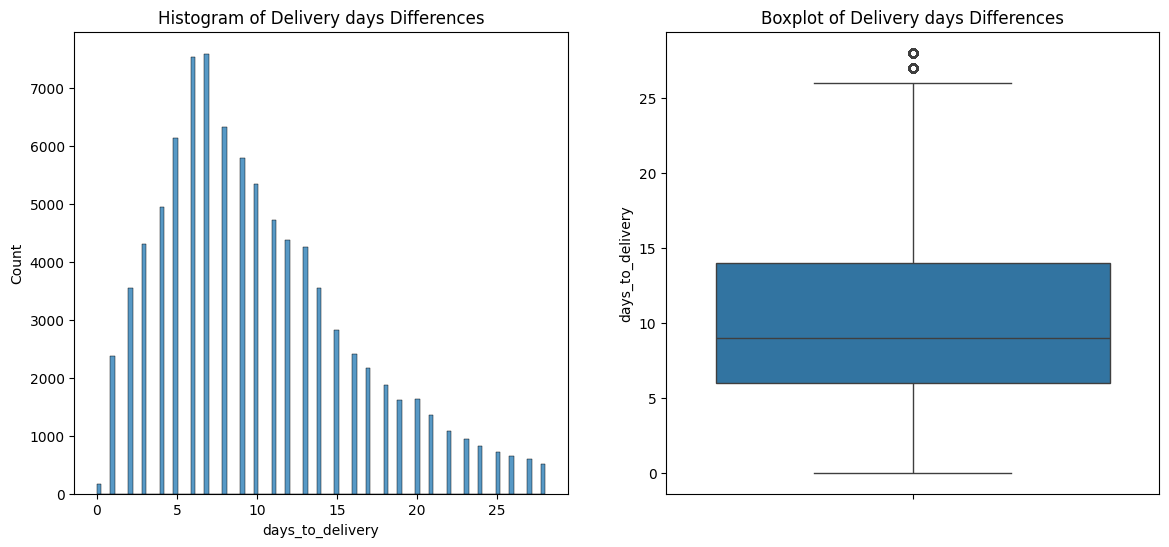

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(mid['days_to_delivery'], bins=100)
plt.title('Histogram of Delivery days Differences')

plt.subplot(1, 2, 2)
sns.boxplot(y=mid['days_to_delivery'])
plt.title('Boxplot of Delivery days Differences')
plt.show()

In [102]:
mid.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivery,estimated_days_to_delivery,delay_flag_estimated,delay_flag_avg
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0,15,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,17,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,26,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,13.0,26,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,2.0,12,0,0


#### CSV 파일로 저장 

In [ ]:
# mid.to_csv('cleaned_orders.csv', index=False)

In [105]:
mid = pd.read_csv('cleaned_orders.csv')
mid.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivery,estimated_days_to_delivery,delay_flag_estimated,delay_flag_avg
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0,15,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,17,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,26,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,13.0,26,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,2.0,12,0,0


## 스파크로 분석

In [49]:
from pyspark.sql import SparkSession
# Spark 세션 생성
spark = SparkSession.builder.appName("orders").getOrCreate()

spk_df = spark.createDataFrame(later_eda)
spk_df.createOrReplaceTempView("orders")

In [50]:
spk_df.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)
 |-- days_to_delivery: double (nullable = true)
 |-- estimated_days_to_delivery: long (nullable = true)
 |-- delay_flag_estimated: long (nullable = true)
 |-- delay_flag_maen: long (nullable = true)



- 월 별로 배송지연율 분석

In [66]:
query = """
WITH CTE AS (
    SELECT 
        order_id,
        customer_id,
        days_to_delivery,
        estimated_days_to_delivery,
        delay_flag_estimated,
        delay_flag_maen,
        CAST(date_format(order_purchase_timestamp, 'yyyy-MM') AS STRING) AS order_purchase_date,
        CAST(date_format(order_approved_at, 'yyyy-MM') AS STRING) AS order_approved_date,
        CAST(date_format(order_delivered_carrier_date, 'yyyy-MM') AS STRING) AS order_delivered_carrier_date,
        CAST(date_format(order_delivered_customer_date, 'yyyy-MM') AS STRING) AS order_delivered_customer_date,
        CAST(date_format(order_estimated_delivery_date, 'yyyy-MM') AS STRING) AS order_estimated_delivery_date
    FROM orders
) 
SELECT  
    order_approved_date,
    AVG(days_to_delivery) AS avg_days_to_delivery, 
    AVG(estimated_days_to_delivery) AS avg_estimated_days_to_delivery,
    AVG(DATEDIFF(order_delivered_carrier_date, order_approved_date)) AS avg_days_seller_to_carrier,
    AVG(DATEDIFF(order_delivered_customer_date, order_delivered_carrier_date)) AS avg_days_carrier_to_customer,
    (SUM(CASE WHEN delay_flag_estimated = 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) AS delay_flag_estimated_ratio,
    (SUM(CASE WHEN delay_flag_maen = 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) AS delay_flag_maen_ratio
FROM CTE
GROUP BY order_approved_date
ORDER BY order_approved_date;
    """
result = spark.sql(query)
result.show(10)

25/02/21 08:44:22 WARN TaskSetManager: Stage 55 contains a task of very large size (1089 KiB). The maximum recommended task size is 1000 KiB.
[Stage 55:>                                                       (0 + 12) / 12]

+-------------------+--------------------+------------------------------+--------------------------+----------------------------+--------------------------+---------------------+
|order_approved_date|avg_days_to_delivery|avg_estimated_days_to_delivery|avg_days_seller_to_carrier|avg_days_carrier_to_customer|delay_flag_estimated_ratio|delay_flag_maen_ratio|
+-------------------+--------------------+------------------------------+--------------------------+----------------------------+--------------------------+---------------------+
|            2016-09|                54.0|                          18.0|                      61.0|                         0.0|        100.00000000000000|   100.00000000000000|
|            2016-10|   18.37037037037037|             54.29259259259259|        3.4407407407407407|           4.011111111111111|          0.74074074074074|    63.33333333333333|
|            2016-12|                 4.0|                          26.0|                       0.0|     

- 월 별로 대체적으로 예상 배송기간을 실제 배송기간에 비해 약 2배정도 큼 이는 전반적으로 예상 배송기간을 너무 포괄적으로 잡는 문제가 있음

- 또한 월 및 분기별로 배송의 지연율을 파악하기에는 데이터가 부족하다고 판단함
- 따라서 **월별,지역별** 데이터를 기준으로 EDA할 예정

25/02/21 08:44:31 WARN TaskSetManager: Stage 58 contains a task of very large size (1089 KiB). The maximum recommended task size is 1000 KiB.
                                                                                

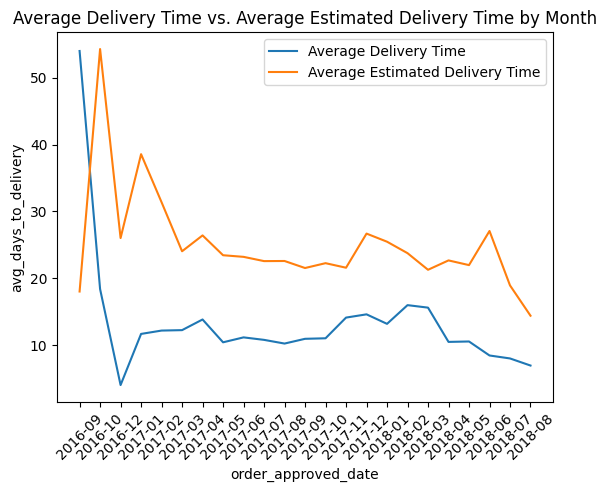

In [67]:
view = result.toPandas().sort_values('order_approved_date')
sns.lineplot(x='order_approved_date', y='avg_days_to_delivery', data=view, label='Average Delivery Time')
sns.lineplot(x='order_approved_date', y='avg_estimated_days_to_delivery', data=view, label='Average Estimated Delivery Time')
plt.xticks(rotation=45)
plt.title('Average Delivery Time vs. Average Estimated Delivery Time by Month')
plt.show()

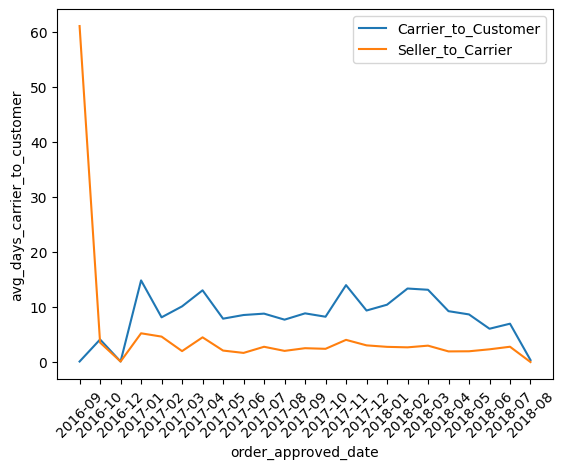

In [69]:
sns.lineplot(x='order_approved_date', y='avg_days_carrier_to_customer', data=view, label='Carrier_to_Customer')
sns.lineplot(x='order_approved_date', y='avg_days_seller_to_carrier', data=view, label='Seller_to_Carrier')
plt.xticks(rotation=45)
plt.show()

판매자가 보낸 물건이 물류회사에 도달하기 까지 걸린 시간은 일반적으로 평탄하게 유지됨
- 다만 , 물류회사에서 고객에게 전달하는데 걸리는 시간이 특정계절에 따라 변동이 있어보임 -> **계절/기후** 와 관련지어 분석

- **월 별** 지연율에 차이가 있는가?

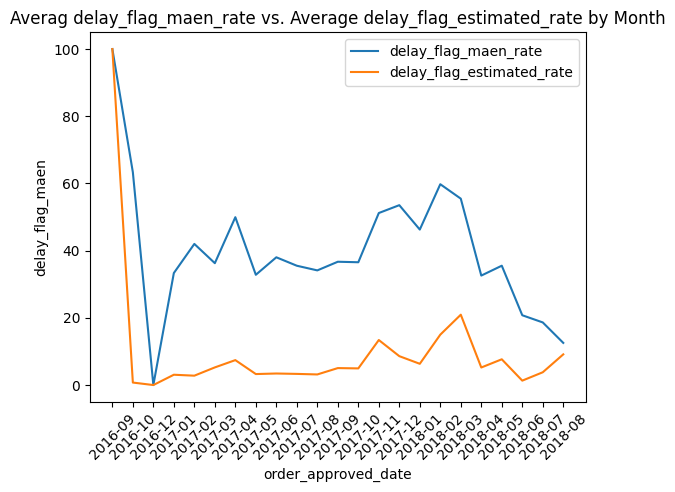

In [62]:
sns.lineplot(x='order_approved_date', y='delay_flag_maen', data=view, label='delay_flag_maen_rate')
sns.lineplot(x='order_approved_date', y='delay_flag_estimated', data=view, label='delay_flag_estimated_rate')
plt.xticks(rotation=45)
plt.title('Averag delay_flag_maen_rate vs. Average delay_flag_estimated_rate by Month')
plt.show()

In [86]:
query = """
WITH CTE AS (
    SELECT 
        *,
        CAST(date_format(order_purchase_timestamp, 'yyyy-MM') AS STRING) as order_purchase_date,
        CAST(date_format(order_approved_at, 'yyyy-MM') AS STRING) as order_approved_date,
        CAST(date_format(order_delivered_carrier_date, 'yyyy-MM') AS STRING) as order_delivered_carrier_date,
        CAST(date_format(order_delivered_customer_date, 'yyyy-MM') AS STRING) as order_delivered_customer_date,
        CAST(date_format(order_estimated_delivery_date, 'yyyy-MM') AS STRING) as order_estimated_delivery_date
    FROM df
) 
SELECT  
    region,
    AVG(days_to_delivery) AS avg_days_to_delivery, 
    AVG(estimated_days_to_delivery) AS avg_estimated_days_to_delivery,
    SUM(CASE WHEN is_delayed = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(is_delayed) AS delayed_rate,
    SUM(CASE WHEN is_lated = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(is_lated) AS lated_rate
FROM CTE
GROUP BY region

    """
result = spark.sql(query)
result.show()

25/02/19 13:53:13 WARN TaskSetManager: Stage 17 contains a task of very large size (1611 KiB). The maximum recommended task size is 1000 KiB.


+------+--------------------+------------------------------+----------------+-----------------+
|region|avg_days_to_delivery|avg_estimated_days_to_delivery|    delayed_rate|       lated_rate|
+------+--------------------+------------------------------+----------------+-----------------+
|    MW|  12.834909228441754|             25.17530257186082|4.02798789712557|60.93040847201210|
|    NE|  15.000854244527495|              27.9232247730913|4.16444207154298|75.20555258942872|
|     N|  16.742485783915516|            33.298131600324936|1.70593013809911|84.24045491470349|
|     S|  11.708952912019827|            24.894903965303595|2.75712515489467|51.51022304832714|
|    SE|   8.643336373110996|            20.106614773319436|4.30074257425743|29.57432256383533|
+------+--------------------+------------------------------+----------------+-----------------+



In [87]:
view = result.toPandas().sort_values('delayed_rate', ascending=False).reset_index(drop=True)
view.head()

25/02/19 13:53:16 WARN TaskSetManager: Stage 20 contains a task of very large size (1611 KiB). The maximum recommended task size is 1000 KiB.


,region,avg_days_to_delivery,avg_estimated_days_to_delivery,delayed_rate,lated_rate
0,SE,8.643336,20.106615,4.30074257425743,29.57432256383533
1,NE,15.000854,27.923225,4.16444207154298,75.20555258942872
2,MW,12.834909,25.175303,4.02798789712557,60.93040847201210
3,S,11.708953,24.894904,2.75712515489467,51.51022304832714
4,N,16.742486,33.298132,1.70593013809911,84.24045491470349


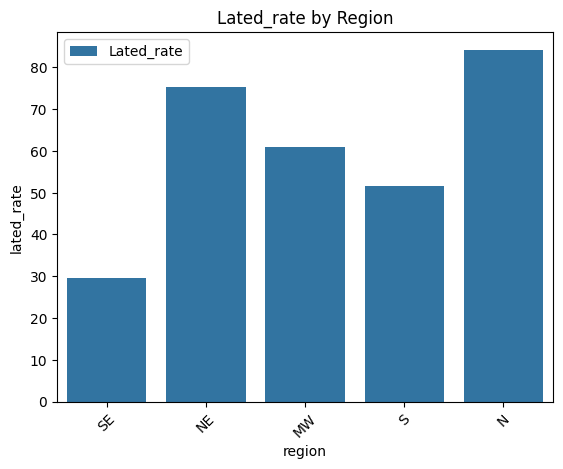

In [89]:
sns.barplot(x='region', y='lated_rate', data=view, label='Lated_rate').set_title('Lated_rate by Region')
plt.xticks(rotation=45)
plt.show()

In [80]:
hash_map = {
    'SP': 'SE', 'RJ': 'SE', 'MG': 'SE',
    'RS': 'S', 'PR': 'S', 'SC': 'S',
    'BA': 'NE', 'DF': 'MW', 'ES': 'NE',
    'GO': 'MW', 'PE': 'NE', 'CE': 'NE',
    'PA': 'N', 'MT': 'MW', 'MA': 'NE',
    'MS': 'MW', 'PB': 'NE', 'PI': 'NE',
    'RN': 'NE', 'AL': 'NE', 'SE': 'NE',
    'TO': 'N', 'RO': 'N', 'AM': 'N',
    'AC': 'N', 'AP': 'N', 'RR': 'N'
}

In [81]:
df['region'] = df['customer_state'].map(hash_map)
df['region']

0        SE
1        NE
2        MW
3        NE
4        SE
         ..
90199    SE
90200    SE
90201    NE
90202    SE
90203     S
Name: region, Length: 90204, dtype: object

In [62]:
df['region'].value_counts()

region
남동부    63266
남부     12912
북동부     7507
중서부     5288
북부      1231
Name: count, dtype: int64

In [ ]:
query = """
    SELECT ca
    FROM df
    GROUP BY customer_state
"""